# First raw image characterization

Lets study the two raw images we have : one of a plate and one of a hand

In [1]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
plt.close('all')

# Constants
Nsample = 1689 # number of samples by line
Nline = 64 # number of lines

# Load data
plate = np.loadtxt('plate.txt')
hand = np.loadtxt('hand.txt')

## The plate

Let mesure the SNR and have a look at the data. for computing the SNR,
I compute the variance one the empty half side of the image. This will be my
estimate of the noise power. To compute the power of the signal, i mesure the
highest possible amplitude and square it.

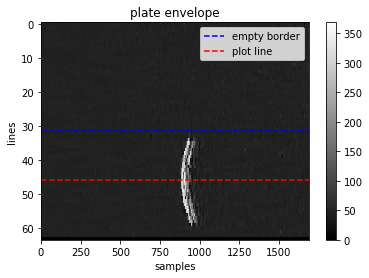

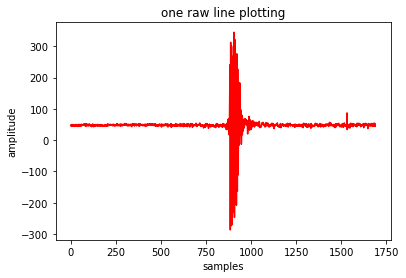

SNR : 40.4 dB


In [2]:
# image plotting

plt.figure(1)
plt.title('plate envelope')
plt.imshow(np.abs(sp.hilbert(plate)), cmap='gray', aspect='auto')
plt.colorbar()
plt.xlabel('samples')
plt.ylabel('lines')

Nempty = 32 # separe the empty from the not empty side
Nplot = 46 # one line chosen for graph display

# repere plotting

plt.plot([0,Nsample-1],[Nempty-0.5,Nempty-0.5],'b--',label='empty border')
plt.plot([0,Nsample-1],[Nplot,Nplot],'r--',label='plot line')
plt.legend()
plt.show()

# graph plotting

plt.figure(2)
plt.title('one raw line plotting')
plt.plot(plate[Nplot,:],'r')
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.show() 

# SNR computation

Pnoise = np.var(plate[:Nempty,:])
Psignal = ((np.max(plate) - np.min(plate))/2)**2
print('SNR :', '{:.1f}'.format(10*np.log10(Psignal/Pnoise)),'dB')

Result : actually the data is coded on 14 bits. But the reference of the red pitaya is 20V and the input is only 1V So on the +/-8192 possible values only 410 are useful. Some noise is visible so i computed the SNR. For that i took the plate image and computed the variance on the half top. It give me the power of the noise. I Then took max and min of the whole signal to compute max amplitude and thus the max signal power. This give 40.4 db of SNR. This agreed s with the value stated by jerome.

Conclusion : If the noise we can see is analog noise, an ADC of 10bit should be enough (60 dB of dynamic range for 40db of SNR). Moreover, if we don't find a way of fully use the 14bits of the red pytaia, this will still be a improvement since we pass from +/-410 values to +/-512.

## The hand

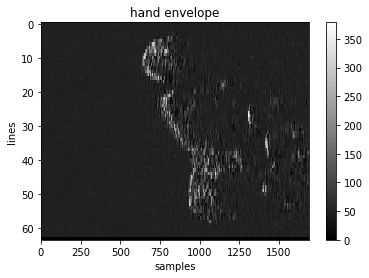

In [3]:
# plot it for fun

plt.figure(3)
plt.title('hand envelope')
plt.imshow(abs(sp.hilbert(hand)), cmap='gray', aspect='auto')
plt.colorbar()
plt.xlabel('samples')
plt.ylabel('lines')
plt.show()